# Image Classification with TensorFlow and the Cassava Leaf Disease Dataset: A Comprehensive Guide

- **Note**: The original tutorial of this notebook is at https://dminhvu.com/tensorflow-cassava-disease-classification, please visit the link to learn more.

## Pre-requisites
Before going to the code below, remember to:
- Clone this notebook so that you are able to edit: File >> Save a Copy in Drive
- Upload your data here including the **train.zip** and **test.zip** files.

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir data

In [ ]:
import gdown

gdown.download(
    "https://drive.google.com/file/d/1E9bp2Q9thu7MytSaEeI51nzoxE2KdIMA/view?usp=share_link",
    "data/train.zip",
    fuzzy=True,
)

gdown.download(
    "https://drive.google.com/file/d/1TmH0QMs1WniPGtLXPOAtHgRUEhZPPyiL/view?usp=share_link",
    "data/test.zip",
    fuzzy=True,
)

Downloading...
From: https://drive.google.com/uc?id=1E9bp2Q9thu7MytSaEeI51nzoxE2KdIMA
To: /content/data/train.zip
100%|██████████| 815M/815M [00:10<00:00, 81.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TmH0QMs1WniPGtLXPOAtHgRUEhZPPyiL
To: /content/data/test.zip
100%|██████████| 540M/540M [00:04<00:00, 123MB/s]


'data/test.zip'

In [ ]:
!unzip data/train.zip -d data/
!unzip data/test.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/train/cbsd/train-cbsd-685.jpg  
  inflating: data/train/cbsd/train-cbsd-74.jpg  
  inflating: data/train/cbsd/train-cbsd-875.jpg  
  inflating: data/train/cbsd/train-cbsd-861.jpg  
  inflating: data/train/cbsd/train-cbsd-60.jpg  
  inflating: data/train/cbsd/train-cbsd-1165.jpg  
  inflating: data/train/cbsd/train-cbsd-134.jpg  
  inflating: data/train/cbsd/train-cbsd-652.jpg  
  inflating: data/train/cbsd/train-cbsd-646.jpg  
  inflating: data/train/cbsd/train-cbsd-120.jpg  
  inflating: data/train/cbsd/train-cbsd-1171.jpg  
  inflating: data/train/cbsd/train-cbsd-108.jpg  
  inflating: data/train/cbsd/train-cbsd-1159.jpg  
  inflating: data/train/cbsd/train-cbsd-1158.jpg  
  inflating: data/train/cbsd/train-cbsd-109.jpg  
  inflating: data/train/cbsd/train-cbsd-647.jpg  
  inflating: data/train/cbsd/train-cbsd-1170.jpg  
  inflating: data/train/cbsd/train-cbsd-121.jpg  
  inflating: data/train/cbsd/train-cbsd-135.jp

## Exploring the Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and test sets
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest',
  validation_split=0.2
)
test_datagen = ImageDataGenerator(
  rescale=1./255
)

# Load the training and test data
train_data = train_datagen.flow_from_directory(
  'data/train/',
  target_size=(224, 224),
  batch_size=32,
  class_mode='categorical',
  shuffle=True,
  subset="training"
)
val_data = train_datagen.flow_from_directory(
  'data/train/',
  target_size=(224, 224),
  batch_size=32,
  class_mode='categorical',
  shuffle=True,
  subset="validation"
)
test_data = test_datagen.flow_from_directory(
  'data/test/',
  target_size=(224, 224),
  batch_size=32,
  class_mode='categorical'
)

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.
Found 3774 images belonging to 1 classes.


## Building the Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(
  weights='imagenet',
  include_top=False,
  input_shape=(224, 224, 3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Add our own fully connected layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Create our final model
model = Model(inputs=base_model.input, outputs=predictions)

## Training and Evaluating the Model

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=5e-5)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=5,
  verbose=1,
)

Epoch 1/5
142/142 [==============================] - 111s 671ms/step - loss: 1.0460 - accuracy: 0.6143 - val_loss: 0.8846 - val_accuracy: 0.6847
Epoch 2/5
142/142 [==============================] - 93s 658ms/step - loss: 0.8428 - accuracy: 0.6923 - val_loss: 0.7786 - val_accuracy: 0.7316
Epoch 3/5
142/142 [==============================] - 93s 654ms/step - loss: 0.7106 - accuracy: 0.7389 - val_loss: 0.6970 - val_accuracy: 0.7502
Epoch 4/5
142/142 [==============================] - 93s 657ms/step - loss: 0.6188 - accuracy: 0.7806 - val_loss: 0.6405 - val_accuracy: 0.7511
Epoch 5/5
142/142 [==============================] - 93s 657ms/step - loss: 0.5760 - accuracy: 0.8019 - val_loss: 0.6012 - val_accuracy: 0.7919


In [ ]:
test_loss, test_acc = model.evaluate(val_data, verbose=0)
print('Test accuracy: ', test_acc)

Test accuracy:  0.7971656322479248


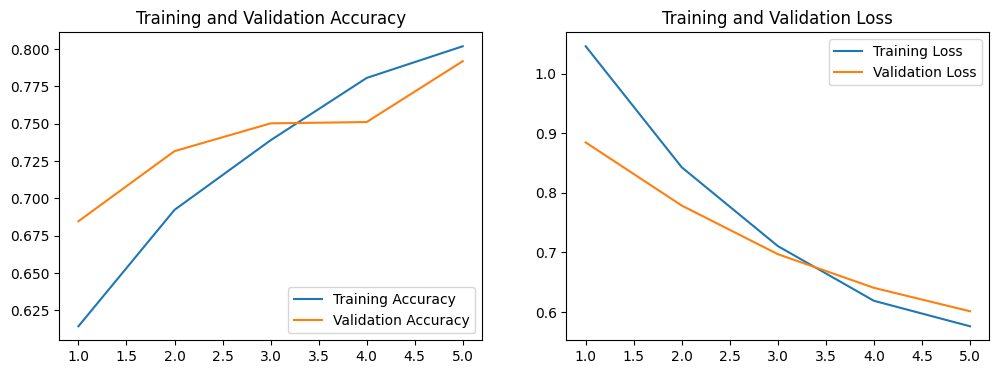

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## Inference

In [ ]:
from PIL import Image
import numpy as np

img = Image.open("data/test/0/test-img-0.jpg")
img = img.resize((224, 224))

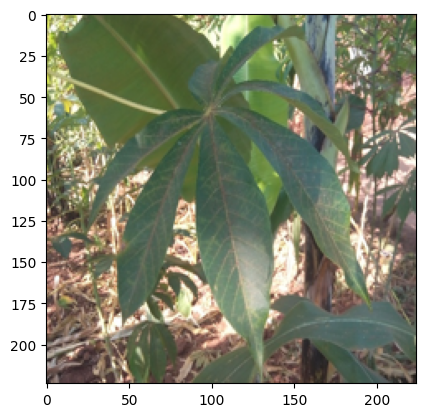

In [ ]:
plt.imshow(img)

In [ ]:
# test image shape
np.expand_dims(np.asarray(img), axis=0).shape

(1, 224, 224, 3)

In [ ]:
img_np = test_datagen.flow(np.expand_dims(np.asarray(img), axis=0))

In [ ]:
img_np[0].shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(img_np)

1/1 [==============================] - 0s 253ms/step


In [ ]:
preds

array([[0.04543798, 0.8857281 , 0.01064665, 0.05115977, 0.00702747]],
      dtype=float32)

In [ ]:
np.argmax(preds[0])

1